# Binary Classification with Logistic Regression and a Fully Connected Neural Network

The dataset you will work with has four predictor variables that have been previously normalized: `diameter`, `red`, `green` and `blue`. These variables will allow you to predict whether a given fruit is an orange or a grapefruit. The training and test sets are in the file `citrus.zip`. 

Keep in mind that you will be writing the Python version of the Matlab implementation of the repository:

https://github.com/danotero/TC3020/tree/main/Neural%20Networks

Let us import the `numpy` library.

In [69]:
import numpy as np

In the following cell the data you will be working with is imported. Please, do not modify this cell. Make sure you download the `citrus.zip` file in the same directory in which you are running this notebook.

In [70]:
X_train = np.genfromtxt("citrus/X_train.csv", delimiter=",")
X_train = X_train[1::]
X_test = np.genfromtxt("citrus/X_test.csv", delimiter=",")
X_test = X_test[1::]
y_train = np.genfromtxt("citrus/y_train.csv", delimiter=",")
y_train = y_train[1::]
y_test = np.genfromtxt("citrus/y_test.csv", delimiter=",")
y_test = y_test[1::]

## Logistic Regression

Complete the functions `logistic` and `cost_logistic` so that you can perform this binary classification using logistic regression. You will need to define the variables `n`, `X`, `w` and `y` appropriately for the model to work properly. Use an $\alpha$ equal to 0.0001. 

Go ahead and define the variables `n`, `X`, `w` and `y`.

In [71]:
ones=np.ones((len(y_train),1))
X =np.append(ones, X_train, axis=1)
Xt = X.T
y = y_train.reshape(len(y_train), 1)
w = np.random.rand(X.shape[1],1)
alpha = 0.0001
m = 1000
n = len(y)
costo = np.zeros((m,1))

Complete the following functions.

In [72]:
def sigmoid(z):
    """
    Write a function that computes the value of the sigmoid function for a given z.
    Do this in such a way that z is allowed to be eaither a scalar, a vector or 
    a matrix.
    """
    z=np.array(z)
    y = 1/(1 + np.exp(-z))
    return y


In [73]:
def cost_logistic(n, X, w, y):

    """
    Write a function that receives the parameters n, w, X and y, and computes the 
    value of the cost function of the Logistic Regression model.
    """
    c = -(1/n)*(y.T.dot(np.log(sigmoid(X.dot(w))))+(1-y).T.dot(np.log(1-sigmoid(X.dot(w)))))
    return c[0]

Run the following cell to train your model.

In [74]:
for i in range(m):
    w = w - alpha * (Xt @ (sigmoid(X @ w) - y))
    costo[i] = cost_logistic(n,X,w,y)

Plot the graph of the cost function versus number of iterations of gradient descent. 

Text(0, 0.5, 'Costo')

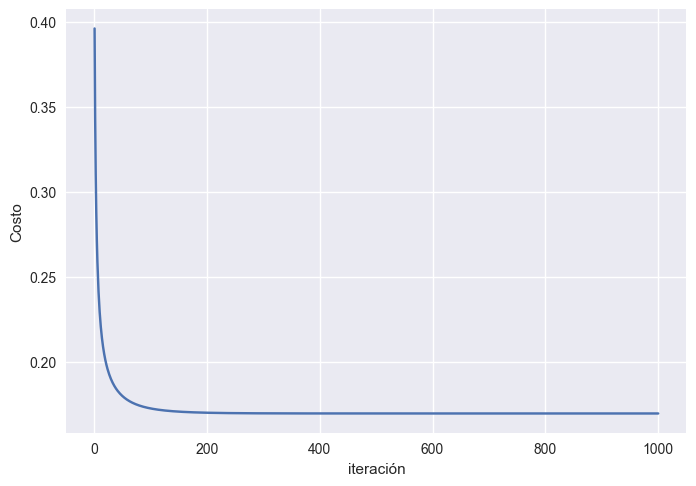

In [75]:
"""
Complete this cell for plotting the cost function.
"""
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(np.arange(1,m+1),costo)
plt.xlabel("iteración")
plt.ylabel("Costo")

Is your implementation minimizing the cost function of the Logistic Regresson model?

**Answer:** Como se puede ver claramente en la gráfica esto es así, pero no llega  un valor tan bajo que cuando se simulaba la compuerta OR, lo que es de esperar porque es un ejercicio mas complicado. Es de notar que lo hace en muy pocas iteraciones, apartir de las 200 no parece hacerse más pequeño.

Compute the predictions of your model using the sigmoid function.

In [76]:
X2=np.append(np.ones((len(y_test),1)), X_test, axis=1)

y_pred_logistic = sigmoid(X2.dot(w))
for i in range(len(y_pred_logistic)):
    if y_pred_logistic[i]>=0.5:
        y_pred_logistic[i]=1
    else:
        y_pred_logistic[i]=0

## A Fully Connected Neural Network

Complete the functions `forward`, `backpropagation` and `cost_neural_network` so that you can carry out this binary classification using a fully connected neural network that has one hidden layer with two neurons and an output layer with one neuron. You will have to define the variables `n`, `X`, `W` and `y` appropriately for the model to work correctly. Use an $\alpha$ equal to 0.1.

Notice that you are using the same data, so you do not have to load it again. Nevertheless, the data has to be modified so that the model you implement works fine. Now define the variables `n`, `X`, `W` and `y`.

In [77]:
ones=np.ones((1,len(y_train)))
X = np.append(ones, X_train.T,axis=0)
Xt = X.T
y = y_train
L = 3
W = {1: np.random.rand(2,5), 2:np.random.rand(1,3)}
alpha = 0.1
m = 1000
n = len(y)
costo = np.zeros((m,1))

Complete the following functions.

In [78]:
def forward(X, W):
    
    """
    Write a function that computes the values of the activations of each layer of 
    a fully connected neural network with two neurons in the hidden layer and one 
    neuron in the output layer.
    """
    n=X.shape[1]
    a1=X
    a2=np.append(np.ones((1,n)), sigmoid(W[1].dot(a1)),axis=0)
    a3 = sigmoid(W[2].dot(a2))
    return a1, a2, a3

In [79]:
def backpropagation(l, n, X, W, y):
    
    """
    Write a function that implements the backpropagation algorithm for a fully 
    connected neural network with two neurons in the hidden layer and one neuron 
    in the output layer.
    """
    
    D = {1: None, 2: None}
    a1,a2,a3 = forward(X,W)
    delta3 = a3-y
    delta2 = (W[2].T*delta3)*a2*(1-a2)
    D[1] = (1/n)*delta2.dot(a1.T)
    D[2] = (1/n)*delta3.dot(a2.T)
    return D

In [80]:
def cost_neural_network(n, X, W, y):

    """
    Write a function that receives the parameters n, w, X and y, and computes the 
    value of the cost function of your fully connected neural network.
    """
    hW = forward(X,W)[2]
    cost = -(1/n)*(y.dot(np.log(hW).T)+(1-y).dot(np.log(1-hW).T))
    return cost

To train your neural network, run the following cell.

In [81]:
for i in range(m):
    D = backpropagation(L-1, n, X, W, y)
    W[1] = W[1] - alpha * D[1][1:3, :]
    W[2] = W[2] - alpha * D[2]
    costo[i] = cost_neural_network(n, X, W, y)

Plot the graph of the cost function versus number of iterations of gradient descent. 

Text(0, 0.5, 'Costo')

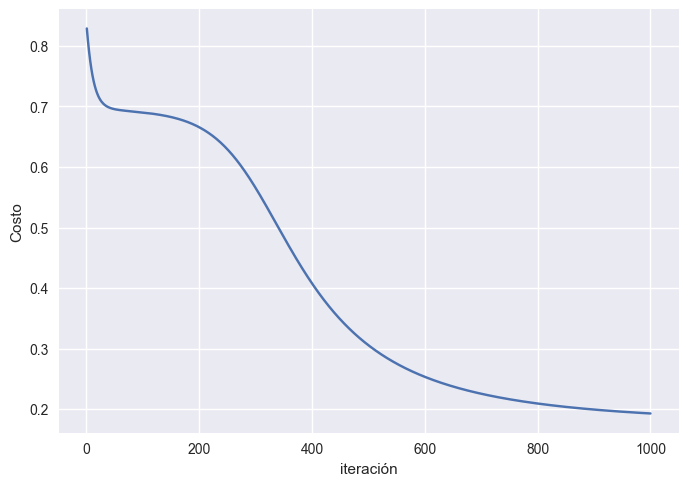

In [82]:
"""
Complete this cell for plotting the cost function.
"""
plt.style.use("seaborn")
plt.plot(np.arange(1,m+1),costo)
plt.xlabel("iteración")
plt.ylabel("Costo")

Is your implementation minimizing the cost function of your neural network?
 
**Answer:** Si. Esta implementación minimiza el costo de la red neuronal; aunque lo hace considerablemente más lento que el modelo de regresión logística. Si aumentamos las iteraciones un poco más (aproximadamente a 2000) podemos ver que la pendiente se vuelve casi 0 conforme se acerca al final.

Compute the predictions of your model using the forward function.

In [83]:
ones=np.ones((1,len(y_test)))
X2 = np.append(ones, X_test.T,axis=0)
y_pred_neural_network = forward(X2,W)[2][0]
for i in range(len(y_pred_neural_network)):
    if y_pred_neural_network[i]>=0.5:
        y_pred_neural_network[i]=1
    else:
        y_pred_neural_network[i]=0

## Evaluating the models

Complete the `accuracy` function and evaluate your models using *accuracy* as the evaluation metric.

In [84]:
def accuracy(y_pred, y_test):
    
    """
    Write a function that computes the accuracy of your model based on its predictions 
    and the true labels that are stored in y_test.
    """
    count=0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            count+=1
    accuracy=count/len(y_pred)

    return accuracy

In [85]:
accuracy_logistic = accuracy(y_pred_logistic, y_test)
accuracy_neural_network = accuracy(y_pred_neural_network, y_test)
print(accuracy_logistic)
print(accuracy_neural_network)

0.929
0.9295


## Conclusions
 
Is the performance of your models good? Analyze and report the results that you obtained in this section.
 
El rendimiento de ambos modelos sobrepasa un “accuracy” mayor al 0.9, lo que es bueno. Curiosamente, ambos modelos tienen un resultado bastante similar, la mayoría de las veces estando alrededor de 0.93. Nosotros esperábamos que el rendimiento de la red neuronal fuera considerablemente mayor al del modelo de regresión logística. Creemos que esto se debe a que, en este caso en particular, la distribución de los datos puede solucionarse de manera lineal. Si consideramos un problema más complejo creemos que la red neuronal debería dar resultados significativamente mayores que el de regresión.
